In [1]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, # 20個生成
                  n_features=2, # 2次元
                  centers=5,    # クラスタ中心2個
                  cluster_std = .8, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap(plt.cm.gist_ncar)

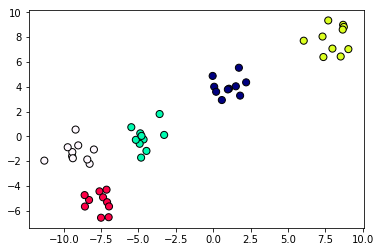

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [4]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [5]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

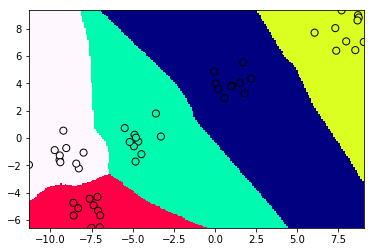

In [6]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

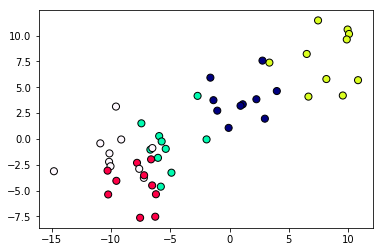

In [7]:
X, y = make_blobs(n_samples=50, # 20個生成
                  n_features=2, # 2次元
                  centers=5,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

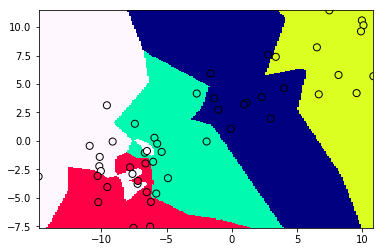

In [8]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

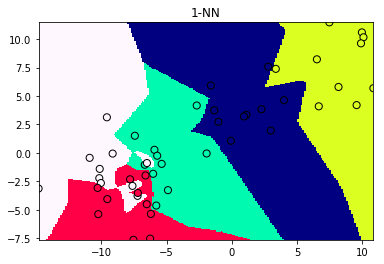

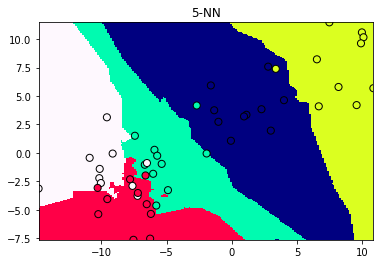

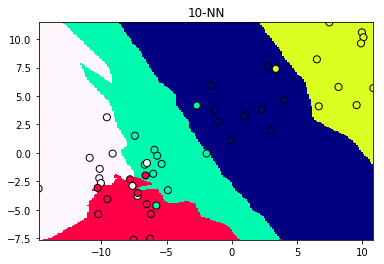

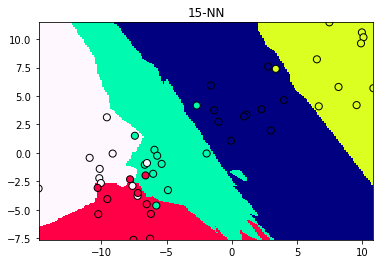

In [9]:
for n in [1, 5, 10, 15]:
    clf.n_neighbors = n
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf)
    plt.title("{0}-NN".format(n))
    plt.show()

In [10]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [11]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [12]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.91228070175438591

In [15]:
n_range = range(1,20)
scores = []
for n in n_range:
    clf.n_neighbors = n
    score = clf.score(X_test, y_test)
    print(n, score) 
    scores.append(score)
scores = np.array(scores)

1 0.912280701754
2 0.894736842105
3 0.912280701754
4 0.921052631579
5 0.938596491228
6 0.938596491228
7 0.947368421053
8 0.947368421053
9 0.964912280702
10 0.947368421053
11 0.964912280702
12 0.964912280702
13 0.964912280702
14 0.964912280702
15 0.964912280702
16 0.964912280702
17 0.964912280702
18 0.964912280702
19 0.964912280702


(0.8, 1)

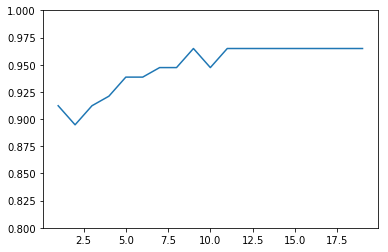

In [16]:
plt.plot(n_range, scores)
plt.ylim(0.8, 1)

In [17]:
clf = neighbors.RadiusNeighborsClassifier()
clf.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=1.0,
             weights='uniform')

In [18]:
n_range = [2000, 4000, 8000]
for n in n_range:
    clf.radius = n
    score = clf.score(X_test, y_test)
    print(n, score) 

2000 0.605263157895
4000 0.587719298246
8000 0.587719298246


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
clf.fit(X_train_scale, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=8000,
             weights='uniform')

In [20]:
X_test_scale = scaler.transform(X_test)

In [21]:
n_range = [3,4,5,6,7]
for n in n_range:
    clf.radius = n
    score = clf.score(X_test_scale, y_test)
    print(n, score) 


3 0.587719298246
4 0.587719298246
5 0.587719298246
6 0.587719298246
7 0.587719298246


In [22]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
n_range = range(1,20)
scores2 = []
for n in n_range:
    clf.n_neighbors = n
    score = clf.score(X_test_scale, y_test)
    print(n, score) 
    scores2.append(score)
scores2 = np.array(scores2)

1 0.947368421053
2 0.938596491228
3 0.947368421053
4 0.956140350877
5 0.956140350877
6 0.982456140351
7 0.964912280702
8 0.973684210526
9 0.973684210526
10 0.982456140351
11 0.973684210526
12 0.973684210526
13 0.973684210526
14 0.973684210526
15 0.973684210526
16 0.973684210526
17 0.973684210526
18 0.973684210526
19 0.973684210526


(0.8, 1)

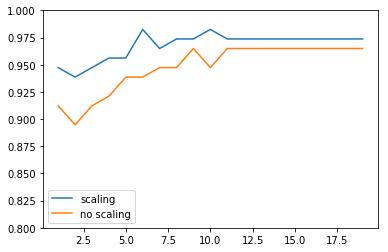

In [24]:
plt.plot(n_range, scores2, label="scaling")
plt.plot(n_range, scores, label="no scaling")
plt.legend(loc='best')
plt.ylim(0.8, 1)